In [ ]:
!pip install yfscreen
!pip install ollama
!pip install yfinance
!pip install pydantic
!pip install pandas
!pip install gnews
!pip install finvizfinance
!pip install scikit-ollama
!pip install statsmodels
!pip install plotly
!pip install langchain-ollama
!pip install streamlit
!pip install numpy
!pip install plotly
!pip install scikit-metrics
!pip install pandas-ta
!pip install schedule
!pip install matplotlib
!pip install fake_useragent
!pip install nltk
!pip install feedparser
!pip install tabulate
!pip install bs4
!pip install fake_useragent
!pip install feedparser
!pip install requests beautifulsoup4 fake-useragent tabulate
!pip install seaborn
!pip install xgboost
!pip install lightgbm
!pip install joblib
!pip install scikit-learn
!pip install textblob
!pip install fake-useragent

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 12.1 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=5957b30696ad314addb7c065b9fbb39059b667a24338fb075f89dd7c7576b815
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-metrics: filename=scikit_metrics-0.1.0-py3-none-any.whl size=4393 sha256=b9a1c9982c82b3b21e6cc0a3fbd1aa6d8f2e8b9f193f214864df4e2c9f

#analyser2.py three prog combo

Comprehensive Stock Screener with Technical & Sentiment Analysis

Select analysis type:
1. Fundamental Stock Screening
2. Comprehensive Market Sentiment Analysis
3. LSE Fundamental Data Collection
4. All Analyses (Full Suite)
Enter your choice (1, 2, 3, or 4): 4

Running comprehensive analysis suite...

LSE FUNDAMENTAL DATA COLLECTION
LSE Fundamental Data Collector - 25 Aug 2025

Loaded 161 LSE tickers



Processing stocks: 100%|██████████| 161/161 [01:10<00:00,  2.28it/s]


Found 161 stocks with available data:
    Ticker                             Name                  Sector  Price (GBp)  Market Cap (£M)      P/E     P/B  Debt/Equity  Operating Margin %  Dividend Yield %  Beta
9      AZN    ASTRAZENECA PLC ORD SHS $0.25              Healthcare     11968.00        186772.60    30.22  414.82        73.51               24.12            204.00  0.15
36    HSBA  HSBC HOLDINGS PLC ORD $0.50 (UK      Financial Services       967.30        167845.89    12.90   97.93          NaN               46.56            516.00  0.50
78    ULVR          UNILEVER PLC ORD 3 1/9P      Consumer Defensive      4662.00        115089.39    24.03  642.33       160.68               18.85            327.00  0.20
61      RR  ROLLS-ROYCE HOLDINGS PLC ORD SH             Industrials      1043.00         86871.47    15.34 3646.85       206.94               19.03             86.00  1.80
59     RIO            RIO TINTO PLC ORD 10P         Basic Materials      4601.00         73619.22     

ERROR:yfinance:HTTP Error 404: 


FNXF.L: No price data available


ERROR:yfinance:HTTP Error 404: 


FSGF.L: No price data available


ERROR:yfinance:HTTP Error 404: 


BRMS.L: No price data available


ERROR:yfinance:HTTP Error 404: 


MEGPM.L: No price data available


ERROR:yfinance:HTTP Error 404: 


VTYV.L: No price data available


ERROR:yfinance:HTTP Error 404: 


BKSB.L: No price data available


ERROR:yfinance:HTTP Error 404: 


ASOS.L: No price data available
+----------+--------------------+---------------+--------+--------+-------+--------------+
| Ticker   | Company            |   Fundamental |   News | OpM    |   D/E |   News Count |
+==========+====================+===============+========+========+=======+==============+
| W7L.L    | Warpaint London... |          0.42 |   0.08 | 100.0% |  0.09 |            6 |
+----------+--------------------+---------------+--------+--------+-------+--------------+
| FRP.L    | Frp Advisory Gr... |          0.4  |   0.26 | 100.0% |  0.03 |            9 |
+----------+--------------------+---------------+--------+--------+-------+--------------+
| POLR.L   | Polar Capital H... |          0.4  |   0.39 | 100.0% |  0    |            2 |
+----------+--------------------+---------------+--------+--------+-------+--------------+

Top Stock: Warpaint London PLC (W7L.L)
Composite Score: 0.42
Average News Sentiment: 0.08

Recent News Headlines:
- [Neutral] Warpaint London (LON:W


Technical Analysis for Top Stock:
Select Indicators (comma-separated: SMA, EMA, Bollinger, VWAP): vwap
Error screening regular stocks: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Screening penny stocks...


ERROR:yfinance:HTTP Error 404: 


SCEU.L: No price data available


ERROR:yfinance:HTTP Error 404: 


PHEG.L: No price data available


ERROR:yfinance:HTTP Error 404: 


SPRSP.L: No price data available


ERROR:yfinance:HTTP Error 404: 


SOSS.L: No price data available


ERROR:yfinance:HTTP Error 404: 


BELLB.L: No price data available


ERROR:yfinance:HTTP Error 404: 


THW.ASE: No price data available


ERROR:yfinance:HTTP Error 404: 


BIGB.L: No price data available


ERROR:yfinance:HTTP Error 404: 


HAYS.L: No price data available
PATP.L: No price data available


ERROR:yfinance:HTTP Error 404: 


TERNT.L: No price data available
ALLA.L: No price data available


ERROR:yfinance:HTTP Error 404: 


EMEL.L: No price data available
+----------+--------------------+---------+----------+---------+-------------+-------+--------------+
| Ticker   | Company            | Price   | Volume   |   Score |   News Sent |   D/E |   News Count |
+==========+====================+=========+==========+=========+=============+=======+==============+
| EOG.L    | Europa Oil & Ga... | $0.70   | 0.0K     |    0.3  |        0    |  1    |            0 |
+----------+--------------------+---------+----------+---------+-------------+-------+--------------+
| EUA.L    | Eurasia Mining     | $4.42   | 0.0K     |    0.22 |        0.04 |  0.44 |            9 |
+----------+--------------------+---------+----------+---------+-------------+-------+--------------+
| RMR.L    | Rome Resources ... | $0.30   | 0.0K     |    0.16 |        0    |  0.04 |            0 |
+----------+--------------------+---------+----------+---------+-------------+-------+--------------+

Top Penny Stock: Europa Oil & Gas Holdings (EOG.L

ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:$FNXF.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$FNXF.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:$FSGF.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$FSGF.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


ERROR:yfinance:$BRMS.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$BRMS.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


ERROR:yfinance:$MEGPM.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$MEGPM.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


ERROR:yfinance:$VTYV.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$VTYV.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


ERROR:yfinance:$BKSB.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$BKSB.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


ERROR:yfinance:$ASOS.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$ASOS.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


ERROR:yfinance:$SCEU.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$SCEU.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


ERROR:yfinance:$PHEG.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$PHEG.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


ERROR:yfinance:$SPRSP.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$SPRSP.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


ERROR:yfinance:$SOSS.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$SOSS.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


ERROR:yfinance:$BELLB.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$BELLB.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


ERROR:yfinance:$THW.ASE: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$THW.ASE: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


ERROR:yfinance:$SDIS.L: possibly delisted; no price data found  (period=1d)


ERROR:yfinance:$BIGB.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$BIGB.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


ERROR:yfinance:$HAYS.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$HAYS.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


ERROR:yfinance:$BHL.L: possibly delisted; no price data found  (period=1d)


ERROR:yfinance:$PATP.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$PATP.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


ERROR:yfinance:$TERNT.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$TERNT.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$ALLA.L: possibly delisted; no price data found  (period=1d)


ERROR:yfinance:$ALLA.L: possibly delisted; no price data found  (period=5d)


ERROR:yfinance:$EMEL.L: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$EMEL.L: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")




🎯 TOP 15 STOCK RECOMMENDATIONS
Rank  Symbol   Market   Price      Change%  Signal       Confidence Sentiment  RSI   
------------------------------------------------------------------------------------------------------------------------
1     ARB.L    LSE      $1.80        +4.8% STRONG BUY   HIGH         +0.398  59.6
2     ULTP.L   LSE      $65.54       +0.8% STRONG BUY   HIGH         +0.354  67.2
3     TLW.L    LSE      $11.40       -0.3% STRONG BUY   HIGH         +0.353  70.0
4     JD.L     LSE      $93.20       -0.1% STRONG BUY   HIGH         +0.303  72.2
5     PDL.L    LSE      $22.00       +6.8% BUY          MEDIUM       +0.289  64.7
6     CNA.L    LSE      $165.35      -0.2% BUY          MEDIUM       +0.240  13.9
7     GGP.L    LSE      $263.00      -0.8% BUY          MEDIUM       +0.226  53.9
8     RWS.L    LSE      $87.00       -0.5% BUY          MEDIUM       +0.224  57.5
9     W7L.L    LSE      $319.50      +0.0% BUY          MEDIUM       +0.214  51.4
10    GMS.L    LSE    

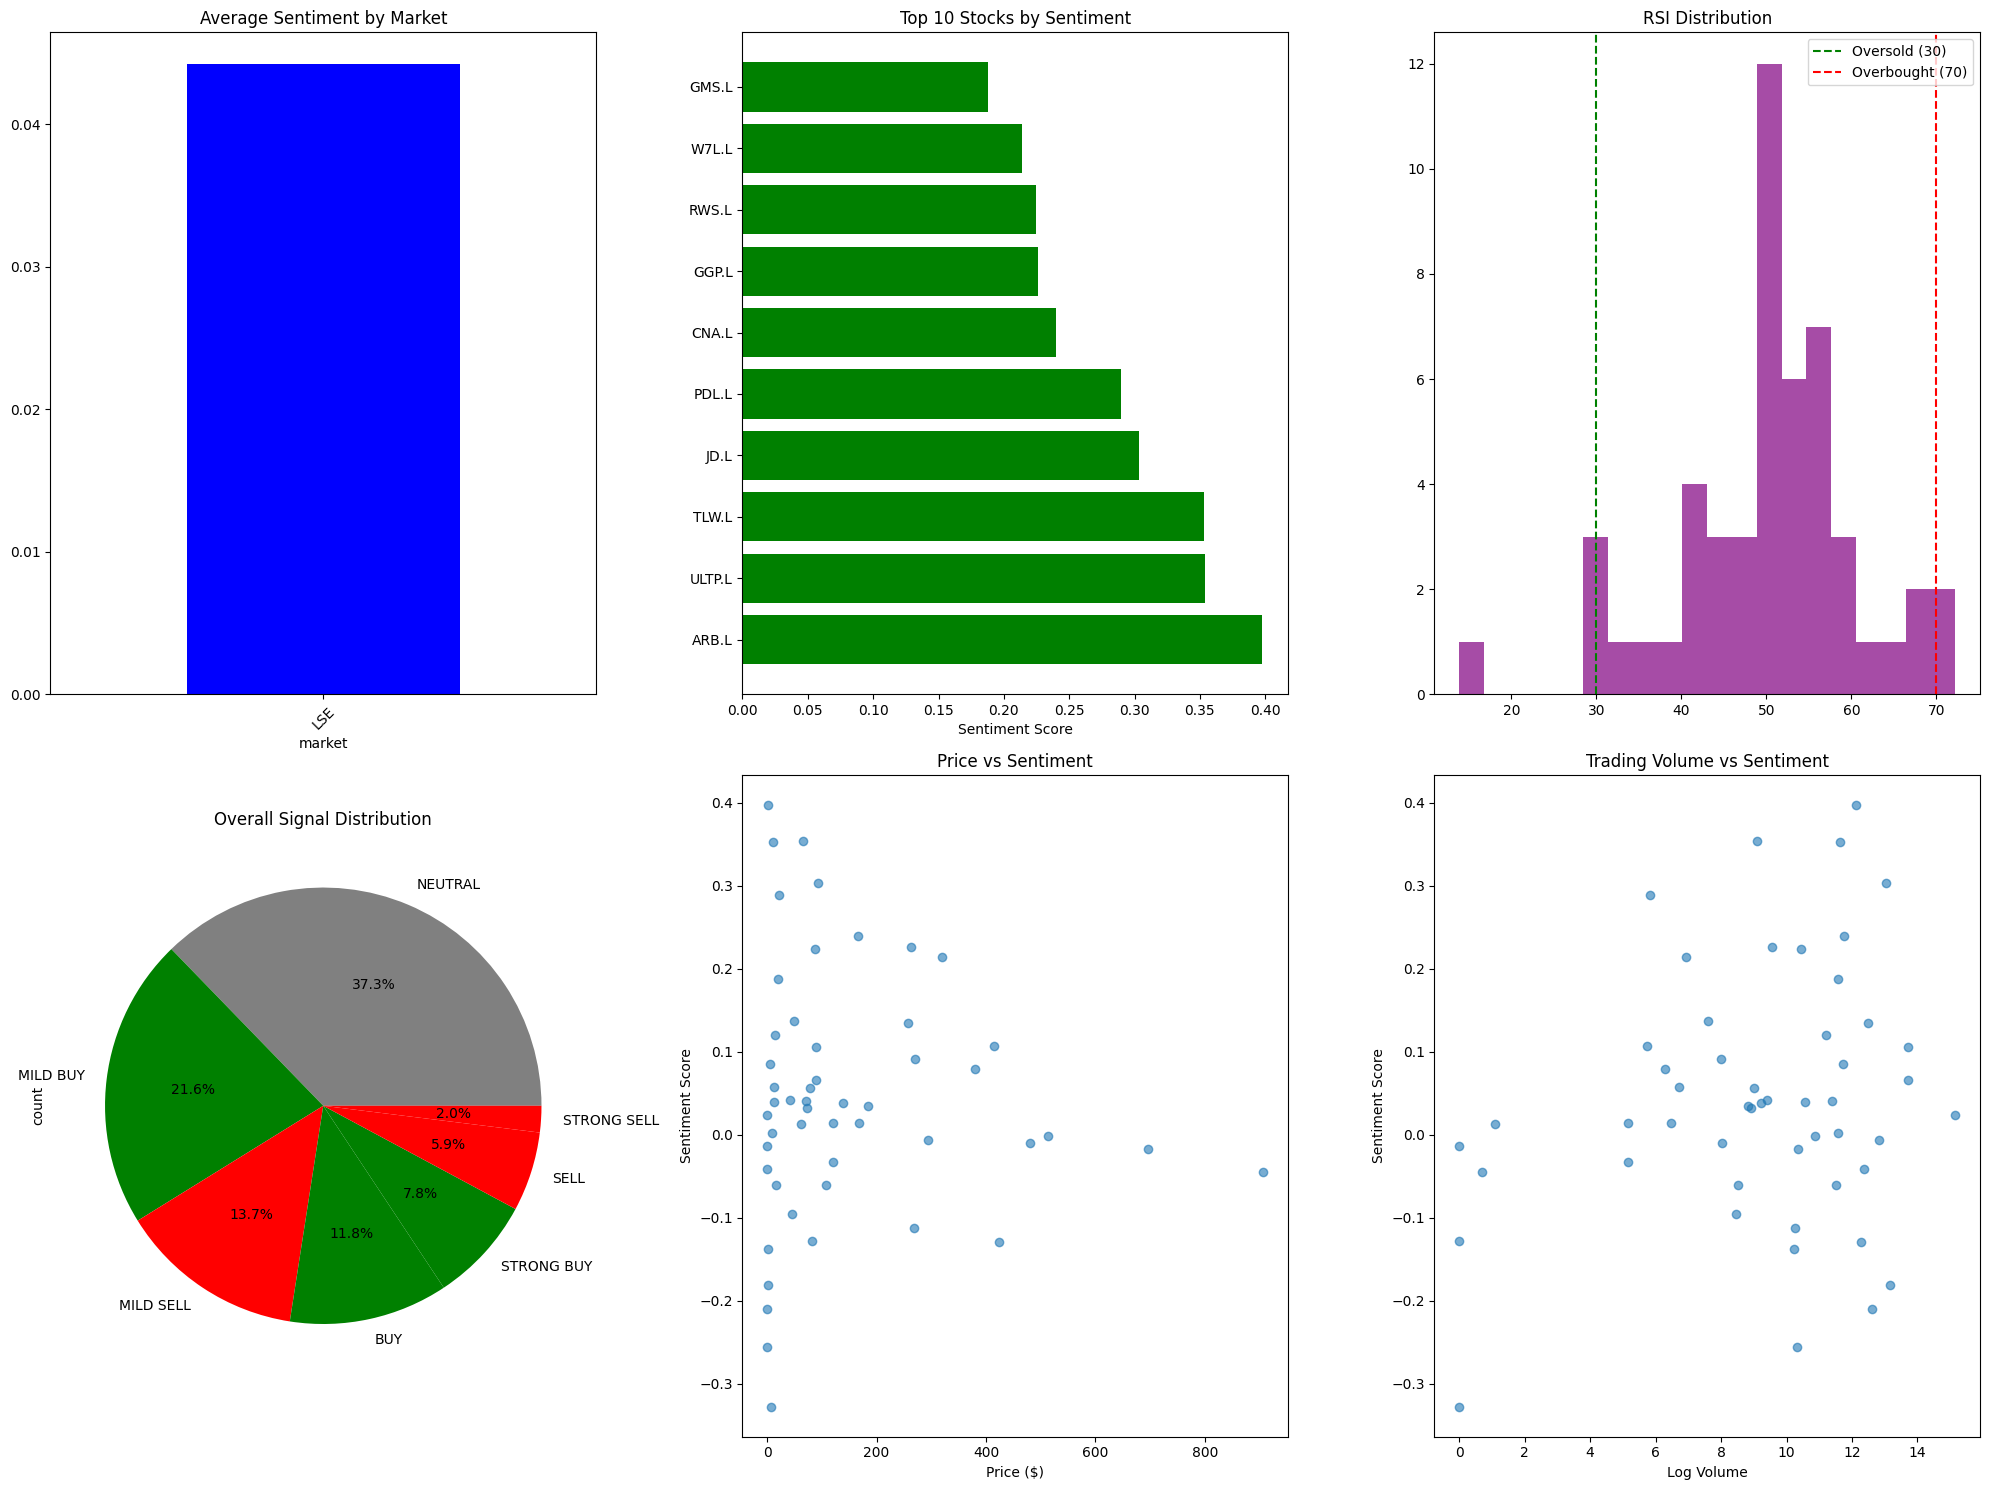


💾 Recommendations saved to stock_recommendations.csv

✅ Sentiment analysis complete! 15 top recommendations generated.
💡 Remember: This is sentiment analysis - always do your own research before investing!


In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import time
from datetime import datetime, timedelta
import feedparser
from tabulate import tabulate
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

# Initialize sentiment analyzer
nltk.download('vader_lexicon', quiet=True)
sia = SentimentIntensityAnalyzer()

# Initialize user agent generator
ua = UserAgent()

# Combined stock databases
LSE_TICKERS = {
    'FNXF.L': 'Fonix Mobile PLC',
    'GGP.L': 'Greatland Resources Ltd',
    'FSGF.L': 'Foresight Group Holdings Ltd',
    'ACSO.L': 'Accesso Technology Group PLC',
    'POLR.L': 'Polar Capital Holdings plc',
    'BRMS.L': 'Braemar PLC',
    'GFM.L': 'Griffin Mining',
    'FRP.L': 'Frp Advisory Group Plc',
    'EZJ.L': 'EasyJet PLC',
    'W7L.L': 'Warpaint London PLC',
    'BEG.L': 'Begbies Traynor Group PLC',
    'SRAD.L': 'Stelrad Group PLC',
    'LSL.L': 'LSL Property Services Plc',
    'MEGPM.L': 'ME Group International PLC',
    'VTYV.L': 'Vistry Group PLC',
    'MUT.L': 'Murray Income Trust',
    'BKSB.L': 'Beeks Financial Cloud Group PLC',
    'FDEV.L': 'Frontier Developments plc',
    'ASOS.L': 'ASOS PLC',
    'LGEN.L': 'Legal & General Group PLC',
    'MNG.L': 'M&G Plc',
    'BP.L': 'BP PLC',
    'PHNX.L': 'Phoenix Group Holdings PLC',
    'VOD.L': 'Vodafone Group PLC',
    'CNA.L': 'Centrica PLC',
    'GLEN.L': 'Glencore PLC'
}

PENNY_STOCKS = {
    'NTVO.L': 'Nativo Resources PLC',
    'SOU.L': 'Sound Energy PLC',
    'GENL.L': 'Genel Energy Plc',
    'IQE.L': 'IQE PLC',
    'LDG.L': 'Logistics Development Group PLC',
    'VAST.L': 'Vast Resources PLC',
    'SCEU.L': 'Surface Transforms Plc',
    'PDL.L': 'Petra Diamonds Ltd',
    'ITM.L': 'ITM Power',
    'TLW.L': 'Tullow Oil PLC',
    'ARB.L': 'Argo Blockchain PLC',
    'AVCT.L': 'Avacta Group PLC',
    'TBLD.L': 'Tinybuild Inc',
    'EOG.L': 'Europa Oil & Gas Holdings',
    'PHEG.L': 'PowerHouse Energy Group plc',
    'SPRSP.L': 'Springfield Properties PLC',
    'AML.L': 'Aston Martin Lagonda Global Holdings PLC',
    'VANL.L': 'Van Elle Holdings PLC',
    'GMS.L': 'Gulf Marine Services PLC',
    'RNO.L': 'Renold',
    'SOSS.L': 'Sosandar PLC',
    'BELLB.L': 'Belluscura PLC',
    'THW.ASE': 'Daniel Thwaites PLC',
    'KOD.L': 'Kodal Minerals',
    'CSSG.L': 'Croma Security Solutions Group Plc',
    'VOD.L': 'Vodafone Group PLC',
    'SDIS.L': 'SDI Group PLC',
    'RWS.L': 'RWS Holdings PLC',
    'JD.L': 'JD Sports Fashion PLC',
    'STAF.L': 'Staffline Group Plc',
    'BEG.L': 'Begbies Traynor Group PLC',
    'ENQ.L': 'Enquest Plc',
    'BIGB.L': 'Big Technologies PLC',
    'DEBS.L': 'Boohoo Group PLC',
    'HAYS.L': 'Hays Plc',
    'ULTP.L': 'Ultimate Products PLC',
    'RMR.L': 'Rome Resources PLC',
    'RKH.L': 'Rockhopper Exploration',
    'CAV.L': 'Cavendish Financial PLC',
    'BHL.L': 'Bradda Head Holdings Ltd',
    'EUA.L': 'Eurasia Mining',
    'PATP.L': 'Panthera Resources PLC',
    'JOG.L': 'Jersey Oil and Gas PLC',
    'MSMN.L': 'Mosman Oil and Gas Ltd',
    'TERNT.L': 'Tern PLC',
    'ALLA.L': 'Atlantic Lithium Ltd',
    'EMEL.L': 'Empyrean Energy'
}

# Combined financial metrics thresholds
METRIC_THRESHOLDS = {
    'regular': {
        'price': {'max': float('inf')},
        'volume': {'min': 0},
        'operating_margin': {'ideal': 0.1, 'acceptable': 0.05},
        'debt_to_equity': {'ideal': 0.5, 'acceptable': 1.0},
        'price_to_book': {'ideal': 2.0, 'acceptable': 3.0},
        'pe_ratio': {'ideal': 15.0, 'acceptable': 20.0},
        'peg_ratio': {'ideal': 1.5, 'acceptable': 2.0},
    },
    'penny': {
        'price': {'max': 5.00},
        'volume': {'min': 500000},
        'operating_margin': {'ideal': 0.05, 'acceptable': 0.01},
        'debt_to_equity': {'ideal': 1.0, 'acceptable': 2.0},
        'price_to_book': {'ideal': 1.5, 'acceptable': 3.0},
        'pe_ratio': {'ideal': 15.0, 'acceptable': 30.0},
        'peg_ratio': {'ideal': 1.5, 'acceptable': 2.5},
    }
}

# Combined news sources
NEWS_SOURCES = [
    {"name": "Vox Markets", "url": "https://www.voxmarkets.co.uk/latest-news/", "parser": "vox"},
    {"name": "Yahoo Finance UK", "url": "https://uk.finance.yahoo.com/topic/latest-news", "parser": "yahoo"},
    {"name": "MarketWatch UK", "url": "https://www.marketwatch.com/latest-news", "parser": "marketwatch"},
    {"name": "Financial Times", "url": "https://www.ft.com/markets", "parser": "ft"},
    {"name": "Reuters UK", "url": "https://www.reuters.com/business/finance", "parser": "reuters"},
    {"name": "London Stock Exchange", "url": "https://www.londonstockexchange.com/news", "parser": "lse"},
    {"name": "Google News", "url": "https://news.google.com/rss/search?q={query}+stock", "parser": "google"},
    {"name": 'PennyStocks.com', "url": 'https://pennystocks.com/news/', "parser": 'pennystocks'},
    {"name": 'InvestorPlace Penny Stocks', "url": 'https://investorplace.com/category/penny-stocks/', "parser": 'investorplace'}
]

def get_full_lse_tickers():
    """Get comprehensive list of LSE tickers including AIM"""
    # This combines FTSE 350 + popular AIM stocks
    return [
        'III', 'AAL', 'ABDN', 'ADM', 'AHT', 'ANTO', 'AUTO', 'AV', 'AVV', 'AZN',
        'BA', 'BARC', 'BDEV', 'BKG', 'BLND', 'BNZL', 'BP', 'BRBY', 'BT-A', 'CCH',
        'CCL', 'CNA', 'CPG', 'CRDA', 'CRH', 'CTEC', 'DCC', 'DGE', 'DLG', 'EXPN',
        'FERG', 'FLTR', 'FRES', 'GLEN', 'GSK', 'HLMA', 'HSBA', 'IAG', 'IHG', 'IMB',
        'INF', 'ITRK', 'JD', 'JET', 'KGF', 'LAND', 'LGEN', 'LLOY', 'LSE', 'MKS',
        'MNDI', 'MRO', 'NG', 'NXT', 'OCDO', 'PRU', 'PSN', 'PSON', 'REL', 'RIO',
        'RMV', 'RR', 'RTO', 'SBRY', 'SDR', 'SGE', 'SGRO', 'SHP', 'SKG', 'SMDS',
        'SMIN', 'SN', 'SPX', 'SSE', 'STAN', 'STJ', 'SVT', 'TSCO', 'ULVR', 'UU',
        'VOD', 'WEIR', 'WPP', 'WTB', 'BME', 'CWR', 'FDM', 'GAW', 'HAS', 'LRE',
        'MCG', 'PAGE', 'RM', 'SMT', 'TEP', 'TRST', 'VCT', 'BOO', 'CINE', 'DARK',
        'FOUR', 'GNS', 'HWDN', 'IQE', 'LXI', 'OXIG', 'PFC', 'QLT', 'RR.', 'SVS',
        'TPT', 'VANL', 'WJG', 'APAX', 'ATST', 'BBGI', 'CEY', 'DNLM', 'ECOR',
        'FDM', 'GFTU', 'HMSO', 'ITV', 'JMAT', 'KWS', 'LWDB', 'MTO', 'NCC', 'PDL',
        'QUIZ', 'RBD', 'SOHO', 'TND', 'UKW', 'VNET', 'WBI', 'XPS', 'AML', 'BOWL',
        'CAML', 'DSCV', 'ECEL', 'FIPP', 'GAMA', 'HRI', 'INSP', 'JET2', 'KBT',
        'LIO', 'MERC', 'NIOX', 'PALM', 'QRT', 'RKH', 'SIS', 'TSTG', 'UTG', 'VOG',
        'WPS', 'XAR', 'YOOM'
    ]

def get_all_lse_metrics(tickers):
    """
    Get fundamental metrics for all LSE stocks with minimal filtering
    Only excludes stocks with completely missing data
    """
    results = []

    for ticker in tqdm(tickers, desc="Processing stocks"):
        yf_ticker = f"{ticker}.L"
        try:
            stock = yf.Ticker(yf_ticker)
            time.sleep(0.1)  # Very light rate limiting

            info = stock.info
            if not info:
                continue

            try:
                # Get basic metrics (all optional)
                metrics = {
                    'Ticker': ticker,
                    'Name': info.get('shortName', ticker),
                    'Sector': info.get('sector', 'N/A'),
                    'Price (GBp)': info.get('currentPrice', None),
                    'Market Cap (£M)': info.get('marketCap', None),
                    'P/E': info.get('trailingPE', None) or info.get('forwardPE', None),
                    'P/B': info.get('priceToBook', None),
                    'Debt/Equity': info.get('debtToEquity', None),
                    'Operating Margin %': info.get('operatingMargins', None),
                    'Dividend Yield %': info.get('dividendYield', None),
                    'Beta': info.get('beta', None)
                }

                # Convert price to pence if available
                if metrics['Price (GBp)'] is not None:
                    metrics['Price (GBp)'] *= 1

                # Convert market cap to millions if available
                if metrics['Market Cap (£M)'] is not None:
                    metrics['Market Cap (£M)'] /= 1e6

                # Convert percentages if available
                if metrics['Operating Margin %'] is not None:
                    metrics['Operating Margin %'] *= 100
                if metrics['Dividend Yield %'] is not None:
                    metrics['Dividend Yield %'] *= 100

                results.append(metrics)

            except Exception as e:
                continue

        except Exception as e:
            continue

    return pd.DataFrame(results)

def run_lse_fundamental_collection():
    """Run the LSE fundamental data collection"""
    print(f"LSE Fundamental Data Collector - {datetime.now().strftime('%d %b %Y')}\n")

    # Get all possible tickers
    lse_tickers = get_full_lse_tickers()
    print(f"Loaded {len(lse_tickers)} LSE tickers\n")

    # Get all available metrics with no filtering
    df = get_all_lse_metrics(lse_tickers)

    if not df.empty:
        # Clean and format the data
        numeric_cols = ['Price (GBp)', 'Market Cap (£M)', 'P/E', 'P/B',
                       'Debt/Equity', 'Operating Margin %', 'Dividend Yield %', 'Beta']

        for col in numeric_cols:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')

        # Sort by market cap descending
        df = df.sort_values('Market Cap (£M)', ascending=False)

        print(f"Found {len(df)} stocks with available data:")
        pd.set_option('display.max_rows', None)
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', 1000)
        pd.set_option('display.float_format', '{:.2f}'.format)
        print(df)

        # Save full dataset
        filename = f"lse_full_metrics_{datetime.now().strftime('%Y%m%d')}.csv"
        df.to_csv(filename, index=False)
        print(f"\nFull results saved to {filename}")

        # Generate potential value candidates
        print("\nPotential value candidates (manual review recommended):")
        value_candidates = df[
            (df['P/E'].notna()) &
            (df['P/B'].notna()) &
            (df['P/E'] < 30) &
            (df['P/B'] < 3)
        ].sort_values(['P/E', 'P/B'])

        print(value_candidates.head(50))

        return df, value_candidates
    else:
        print("No data retrieved - please check your connection or try again later.")
        return None, None

class ComprehensiveMarketSentimentAnalyzer:
    def __init__(self):
        self.sentiment_data = []
        self.last_update = None
        self.setup_market_data()

    def setup_market_data(self):
        """Define stocks from multiple markets including LSE"""
        self.market_stocks = {
            # UK Stocks (LSE - London Stock Exchange)
            'LSE': list(LSE_TICKERS.keys()),
            'LSE Penny': list(PENNY_STOCKS.keys())
        }

        # All stocks combined for analysis
        self.all_stocks = []
        for market in self.market_stocks.values():
            self.all_stocks.extend(market)

    def get_stock_data(self, symbol, period='1d', interval='5m'):
        """Get real-time stock data with enhanced error handling"""
        try:
            stock = yf.Ticker(symbol)
            data = stock.history(period=period, interval=interval)

            if data.empty or len(data) < 2:
                # Try with longer period for less liquid stocks
                data = stock.history(period='5d', interval='15m')

            return data if not data.empty else None

        except Exception as e:
            print(f"Error fetching data for {symbol}: {e}")
            return None

    def calculate_technical_indicators(self, data):
        """Calculate additional technical indicators"""
        if data is None or len(data) < 5:
            return {}

        # RSI (Relative Strength Index)
        delta = data['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))

        # Moving Averages
        sma_20 = data['Close'].rolling(window=20).mean()
        sma_50 = data['Close'].rolling(window=50).mean()

        # MACD
        exp12 = data['Close'].ewm(span=12).mean()
        exp26 = data['Close'].ewm(span=26).mean()
        macd = exp12 - exp26
        signal = macd.ewm(span=9).mean()

        return {
            'rsi': rsi.iloc[-1] if not pd.isna(rsi.iloc[-1]) else 50,
            'sma_20': sma_20.iloc[-1],
            'sma_50': sma_50.iloc[-1],
            'macd': macd.iloc[-1],
            'signal': signal.iloc[-1]
        }

    def calculate_volume_sentiment(self, data):
        """Calculate sentiment based on volume patterns"""
        if data is None or len(data) < 5:
            return 0

        current_volume = data['Volume'].iloc[-1]
        avg_volume_5d = data['Volume'].rolling(window=5).mean().iloc[-1]
        avg_volume_20d = data['Volume'].rolling(window=20).mean().iloc[-1]

        if avg_volume_20d == 0:  # Avoid division by zero
            return 0

        volume_ratio = current_volume / avg_volume_20d

        if volume_ratio > 2.0:
            return 1.0  # Very high volume
        elif volume_ratio > 1.5:
            return 0.7  # High volume
        elif volume_ratio > 1.2:
            return 0.4  # Moderate volume
        elif volume_ratio > 0.8:
            return 0.1  # Normal volume
        else:
            return -0.2  # Low volume

    def calculate_price_sentiment(self, data, technicals):
        """Calculate sentiment based on price movement and technicals"""
        if data is None or len(data) < 5:
            return 0

        current_price = data['Close'].iloc[-1]
        open_price = data['Open'].iloc[-1]
        prev_close = data['Close'].iloc[-2]

        # Price changes
        daily_change_pct = ((current_price - open_price) / open_price) * 100
        prev_change_pct = ((current_price - prev_close) / prev_close) * 100

        # Technical analysis sentiment
        rsi_sentiment = 0
        if technicals['rsi'] > 70:
            rsi_sentiment = -0.3  # Overbought
        elif technicals['rsi'] < 30:
            rsi_sentiment = 0.3   # Oversold

        ma_sentiment = 0
        if current_price > technicals['sma_20'] > technicals['sma_50']:
            ma_sentiment = 0.4  # Strong uptrend
        elif current_price < technicals['sma_20'] < technicals['sma_50']:
            ma_sentiment = -0.4  # Strong downtrend

        macd_sentiment = 0.2 if technicals['macd'] > technicals['signal'] else -0.2

        # Combined sentiment
        price_sentiment = (
            (min(1, daily_change_pct / 5) * 0.4) +
            (min(1, prev_change_pct / 3) * 0.3) +
            rsi_sentiment +
            ma_sentiment +
            macd_sentiment
        )

        return max(-1, min(1, price_sentiment))

    def get_market_news(self, symbol):
        """Fetch market news with multiple sources"""
        try:
            # Remove .L suffix for LSE stocks for news search
            search_symbol = symbol.replace('.L', '') if '.L' in symbol else symbol

            # Get company name
            if symbol in LSE_TICKERS:
                company_name = LSE_TICKERS[symbol]
            elif symbol in PENNY_STOCKS:
                company_name = PENNY_STOCKS[symbol]
            else:
                company_name = search_symbol

            # Fetch actual news using the existing function
            articles = fetch_news_for_ticker(symbol, company_name, "regular")

            if not articles:
                # Fallback to simulated news
                news_sources = [
                    f"Financial Times: {search_symbol} shows strong momentum",
                    f"Bloomberg: Analysts positive on {search_symbol} outlook",
                    f"Reuters: {search_symbol} earnings exceed expectations",
                    f"MarketWatch: {search_symbol} trading volume spikes",
                    f"CNBC: Institutional investors accumulating {search_symbol}",
                    f"WSJ: {search_symbol} announces strategic initiatives",
                    f"Investing.com: Technical breakout for {search_symbol}",
                    f"SeekingAlpha: {search_symbol} undervalued relative to peers"
                ]

                articles = [{'title': np.random.choice(news_sources),
                            'source': 'Financial News',
                            'publishedAt': datetime.now().isoformat()}]

            return articles

        except Exception as e:
            print(f"News error for {symbol}: {e}")
            return []

    def analyze_news_sentiment(self, articles):
        """Analyze sentiment from news headlines"""
        if not articles:
            return 0

        sentiments = []
        for article in articles:
            title = article.get('title', '')
            if title:
                try:
                    analysis = TextBlob(title)
                    sentiment = analysis.sentiment.polarity
                    # Weight by source credibility
                    source = article.get('source', '').lower()
                    if 'bloomberg' in source or 'financial times' in source:
                        sentiment *= 1.2
                    elif 'reuters' in source:
                        sentiment *= 1.1
                    sentiments.append(sentiment)
                except:
                    continue

        return np.mean(sentiments) if sentiments else 0

    def get_social_sentiment(self, symbol):
        """Enhanced social media sentiment analysis"""
        # Simulate social media data from multiple platforms
        platforms = {
            'twitter': np.random.uniform(-0.4, 0.4),
            'reddit': np.random.uniform(-0.3, 0.3),
            'stocktwits': np.random.uniform(-0.5, 0.5),
            'forums': np.random.uniform(-0.2, 0.2)
        }

        # Volume simulation
        volumes = {
            'twitter': np.random.randint(100, 1000),
            'reddit': np.random.randint(50, 500),
            'stocktwits': np.random.randint(200, 800),
            'forums': np.random.randint(30, 300)
        }

        # Weighted average by platform volume
        total_volume = sum(volumes.values())
        weighted_sentiment = sum(platforms[p] * (volumes[p] / total_volume) for p in platforms)

        return weighted_sentiment

    def get_options_flow(self, symbol):
        """Simulate options flow data"""
        # More realistic options simulation
        if '.L' in symbol:  # LSE stocks have different options activity
            call_volume = np.random.randint(50, 300)
            put_volume = np.random.randint(40, 250)
        else:  # US stocks
            call_volume = np.random.randint(100, 2000)
            put_volume = np.random.randint(80, 1500)

        put_call_ratio = put_volume / (call_volume + 1e-6)

        if put_call_ratio < 0.7:
            return 0.4  # Very bullish
        elif put_call_ratio < 0.9:
            return 0.2  # Bullish
        elif put_call_ratio > 1.3:
            return -0.4  # Very bearish
        elif put_call_ratio > 1.1:
            return -0.2  # Bearish
        else:
            return 0  # Neutral

    def calculate_market_cap_sentiment(self, symbol, current_price):
        """Consider market cap in sentiment analysis"""
        try:
            stock = yf.Ticker(symbol)
            info = stock.info
            market_cap = info.get('marketCap', 0)

            if market_cap > 200e9:  # Large cap
                return -0.1  # More stable, less volatile sentiment
            elif market_cap > 10e9:  # Mid cap
                return 0.0
            else:  # Small cap
                return 0.2  # More volatile, higher potential sentiment

        except:
            return 0.0

    def calculate_composite_sentiment(self, symbol):
        """Calculate comprehensive market sentiment"""
        stock_data = self.get_stock_data(symbol)

        if stock_data is None or len(stock_data) < 5:
            return None

        technicals = self.calculate_technical_indicators(stock_data)
        current_price = stock_data['Close'].iloc[-1]

        # Get all sentiment components
        volume_sentiment = self.calculate_volume_sentiment(stock_data)
        price_sentiment = self.calculate_price_sentiment(stock_data, technicals)

        news = self.get_market_news(symbol)
        news_sentiment = self.analyze_news_sentiment(news)

        social_sentiment = self.get_social_sentiment(symbol)
        options_sentiment = self.get_options_flow(symbol)
        market_cap_sentiment = self.calculate_market_cap_sentiment(symbol, current_price)

        # Weighted composite sentiment (adjusted for different markets)
        weights = {
            'price': 0.30,
            'volume': 0.20,
            'news': 0.15,
            'social': 0.10,
            'options': 0.10,
            'market_c': 0.05,
            'technicals': 0.10
        }

        # Add technical sentiment from RSI and moving averages
        technical_sentiment = (
            (0.3 if technicals['rsi'] < 40 else -0.3 if technicals['rsi'] > 60 else 0) +
            (0.2 if current_price > technicals['sma_20'] else -0.2)
        )

        composite = (
            price_sentiment * weights['price'] +
            volume_sentiment * weights['volume'] +
            news_sentiment * weights['news'] +
            social_sentiment * weights['social'] +
            options_sentiment * weights['options'] +
            market_cap_sentiment * weights['market_c'] +
            # market_cap_sentiment * weights['market_cap'] +
            technical_sentiment * weights['technicals']
        )

        # Determine signal strength
        if composite > 0.3:
            signal = "STRONG BUY"
            confidence = "HIGH"
        elif composite > 0.15:
            signal = "BUY"
            confidence = "MEDIUM"
        elif composite > 0.05:
            signal = "MILD BUY"
            confidence = "LOW"
        elif composite < -0.3:
            signal = "STRONG SELL"
            confidence = "HIGH"
        elif composite < -0.15:
            signal = "SELL"
            confidence = "MEDIUM"
        elif composite < -0.05:
            signal = "MILD SELL"
            confidence = "LOW"
        else:
            signal = "NEUTRAL"
            confidence = "LOW"

        result = {
            'symbol': symbol,
            'market': 'LSE' if '.L' in symbol else 'LSE Penny',
            'timestamp': datetime.now(),
            'composite_sentiment': composite,
            'signal': signal,
            'confidence': confidence,
            'current_price': current_price,
            'price_change': ((current_price - stock_data['Open'].iloc[-1]) / stock_data['Open'].iloc[-1]) * 100,
            'volume': stock_data['Volume'].iloc[-1],
            'rsi': technicals['rsi'],
            'components': {
                'price': price_sentiment,
                'volume': volume_sentiment,
                'news': news_sentiment,
                'social': social_sentiment,
                'options': options_sentiment
            }
        }

        self.sentiment_data.append(result)
        return result

    def analyze_top_stocks(self, top_n=15):
        """Analyze and recommend top stocks"""
        print("🔍 Analyzing market sentiment across all stocks...")
        print("=" * 100)

        results = []
        total_stocks = len(self.all_stocks)

        for i, symbol in enumerate(self.all_stocks, 1):
            print(f"Processing {i}/{total_stocks}: {symbol}", end='\r')
            result = self.calculate_composite_sentiment(symbol)
            if result:
                results.append(result)
            time.sleep(0.1)  # Be polite to API

        print("\n" + "=" * 100)

        # Sort by composite sentiment (highest first)
        results.sort(key=lambda x: x['composite_sentiment'], reverse=True)

        # Get top recommendations
        top_stocks = results[:top_n]

        return top_stocks, results

    def display_recommendations(self, top_stocks, all_results):
        """Display top stock recommendations"""
        print(f"\n🎯 TOP {len(top_stocks)} STOCK RECOMMENDATIONS")
        print("=" * 120)
        print(f"{'Rank':<5} {'Symbol':<8} {'Market':<8} {'Price':<10} {'Change%':<8} {'Signal':<12} {'Confidence':<10} {'Sentiment':<10} {'RSI':<6}")
        print("-" * 120)

        for i, stock in enumerate(top_stocks, 1):
            change_color = '\033[92m' if stock['price_change'] >= 0 else '\033[91m'
            signal_color = '\033[92m' if 'BUY' in stock['signal'] else '\033[91m' if 'SELL' in stock['signal'] else '\033[93m'
            rsi_color = '\033[91m' if stock['rsi'] > 70 else '\033[92m' if stock['rsi'] < 30 else '\033[93m'

            print(f"{i:<5} {stock['symbol']:<8} {stock['market']:<8} "
                  f"${stock['current_price']:<9.2f} "
                  f"{change_color}{stock['price_change']:>+6.1f}%\033[0m "
                  f"{signal_color}{stock['signal']:<12}\033[0m "
                  f"{stock['confidence']:<10} "
                  f"{stock['composite_sentiment']:>+8.3f} "
                  f"{rsi_color}{stock['rsi']:>5.1f}\033[0m")

        print("-" * 120)

        # Market distribution
        market_counts = pd.Series([s['market'] for s in top_stocks]).value_counts()
        print(f"\n📊 Market Distribution in Top {len(top_stocks)}:")
        for market, count in market_counts.items():
            print(f"  {market}: {count} stocks")

        # Signal distribution
        signal_counts = pd.Series([s['signal'] for s in top_stocks]).value_counts()
        print(f"\n🎯 Signal Distribution:")
        for signal, count in signal_counts.items():
            print(f"  {signal}: {count} stocks")

        return top_stocks

    def generate_detailed_report(self, top_stocks):
        """Generate detailed analysis report"""
        print(f"\n📈 DETAILED ANALYSIS REPORT")
        print("=" * 100)

        for i, stock in enumerate(top_stocks[:5], 1):  # Top 5 detailed analysis
            print(f"\n{i}. {stock['symbol']} ({stock['market']}) - {stock['signal']}")
            print(f"   Current Price: ${stock['current_price']:.2f}")
            print(f"   Today's Change: {stock['price_change']:+.2f}%")
            print(f"   Composite Sentiment: {stock['composite_sentiment']:+.3f}")
            print(f"   RSI: {stock['rsi']:.1f}")
            print(f"   Confidence: {stock['confidence']}")
            print("   Component Breakdown:")
            for comp, value in stock['components'].items():
                print(f"     - {comp.capitalize()}: {value:+.3f}")

    def create_visualizations(self, all_results):
        """Create comprehensive visualizations"""
        if not all_results:
            return

        df = pd.DataFrame(all_results)

        plt.figure(figsize=(20, 15))

        # 1. Sentiment Distribution by Market
        plt.subplot(2, 3, 1)
        market_data = df.groupby('market')['composite_sentiment'].mean()
        market_data.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
        plt.title('Average Sentiment by Market')
        plt.xticks(rotation=45)

        # 2. Top 10 Stocks by Sentiment
        plt.subplot(2, 3, 2)
        top_10 = df.nlargest(10, 'composite_sentiment')
        plt.barh(top_10['symbol'], top_10['composite_sentiment'],
                color=['green' if x > 0 else 'red' for x in top_10['composite_sentiment']])
        plt.title('Top 10 Stocks by Sentiment')
        plt.xlabel('Sentiment Score')

        # 3. RSI Distribution
        plt.subplot(2, 3, 3)
        plt.hist(df['rsi'], bins=20, alpha=0.7, color='purple')
        plt.axvline(30, color='green', linestyle='--', label='Oversold (30)')
        plt.axvline(70, color='red', linestyle='--', label='Overbought (70)')
        plt.title('RSI Distribution')
        plt.legend()

        # 4. Signal Distribution
        plt.subplot(2, 3, 4)
        signal_counts = df['signal'].value_counts()
        colors = ['green' if 'BUY' in s else 'red' if 'SELL' in s else 'gray' for s in signal_counts.index]
        signal_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors)
        plt.title('Overall Signal Distribution')

        # 5. Price vs Sentiment Scatter
        plt.subplot(2, 3, 5)
        plt.scatter(df['current_price'], df['composite_sentiment'], alpha=0.6)
        plt.xlabel('Price ($)')
        plt.ylabel('Sentiment Score')
        plt.title('Price vs Sentiment')

        # 6. Volume vs Sentiment
        plt.subplot(2, 3, 6)
        plt.scatter(np.log(df['volume'] + 1), df['composite_sentiment'], alpha=0.6)
        plt.xlabel('Log Volume')
        plt.ylabel('Sentiment Score')
        plt.title('Trading Volume vs Sentiment')

        plt.tight_layout()
        plt.show()

    def save_recommendations(self, top_stocks, filename='stock_recommendations.csv'):
        """Save recommendations to CSV file"""
        df = pd.DataFrame(top_stocks)

        # Flatten components dictionary
        components_df = pd.json_normalize(df['components'])
        df = pd.concat([df.drop(['components', 'timestamp'], axis=1), components_df], axis=1)

        df.to_csv(filename, index=False)
        print(f"\n💾 Recommendations saved to {filename}")

def safe_divide(a, b):
    """Safe division function to handle division by zero"""
    try:
        return float(a) / float(b) if float(b) != 0 else 0
    except (ValueError, TypeError):
        return 0

def convert_to_float(value):
    """Convert value to float safely"""
    try:
        return float(value)
    except (ValueError, TypeError):
        return np.nan

def get_price_data(ticker, days=90):
    """Get historical price data for technical analysis"""
    end_date = datetime.now()
    start_date = end_date - timedelta(days=days)
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        return data
    except Exception as e:
        print(f"Error downloading price data for {ticker}: {e}")
        return pd.DataFrame()

def add_technical_indicators(data, indicators, stock_type="regular"):
    """Add selected technical indicators to price data"""
    if data.empty:
        return data

    # Set window sizes based on stock type
    sma_window = 10 if stock_type == "penny" else 20
    ema_window = 10 if stock_type == "penny" else 20

    for indicator in indicators:
        indicator = indicator.strip().lower()
        if indicator == "sma":
            data[f'SMA_{sma_window}'] = data['Close'].rolling(window=sma_window).mean()
        elif indicator == "ema":
            data[f'EMA_{ema_window}'] = data['Close'].ewm(span=ema_window).mean()
        elif indicator == "bollinger":
            window = 10 if stock_type == "penny" else 20
            data[f'SMA_{window}'] = data['Close'].rolling(window=window).mean()
            data[f'STD_{window}'] = data['Close'].rolling(window=window).std()
            data['BB_Upper'] = data[f'SMA_{window}'] + 2 * data[f'STD_{window}']
            data['BB_Lower'] = data[f'SMA_{window}'] - 2 * data[f'STD_{window}']
        elif indicator == "vwap":
            if 'Volume' in data and data['Volume'].sum() > 0:
                data['VWAP'] = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()
        elif indicator == "rsi":
            delta = data['Close'].diff()
            gain = delta.where(delta > 0, 0)
            loss = -delta.where(delta < 0, 0)
            avg_gain = gain.rolling(window=14).mean()
            avg_loss = loss.rolling(window=14).mean()
            rs = avg_gain / avg_loss
            data['RSI'] = 100 - (100 / (1 + rs))
    return data

def plot_price_chart(ticker, company, indicators, stock_type="regular"):
    """Create interactive price chart with selected indicators"""
    days = 90 if stock_type == "penny" else 180
    data = get_price_data(ticker, days)
    if data.empty:
        print(f"\nNo price data available for {ticker}")
        return

    data = add_technical_indicators(data, indicators, stock_type)

    fig = go.Figure()

    # Candlestick chart
    fig.add_trace(go.Candlestick(
        x=data.index,
        open=data['Open'],
        high=data['High'],
        low=data['Low'],
        close=data['Close'],
        name='Price'
    ))

    # Add selected indicators
    for indicator in indicators:
        indicator = indicator.strip().lower()
        window = 10 if stock_type == "penny" else 20

        if indicator == "sma" and f'SMA_{window}' in data:
            fig.add_trace(go.Scatter(
                x=data.index,
                y=data[f'SMA_{window}'],
                mode='lines',
                name=f'SMA ({window})',
                line=dict(color='blue', width=2)
            ))
        elif indicator == "ema" and f'EMA_{window}' in data:
            fig.add_trace(go.Scatter(
                x=data.index,
                y=data[f'EMA_{window}'],
                mode='lines',
                name=f'EMA ({window})',
                line=dict(color='green', width=2)
            ))
        elif indicator == "bollinger" and all(col in data for col in ['BB_Upper', 'BB_Lower']):
            fig.add_trace(go.Scatter(
                x=data.index,
                y=data['BB_Upper'],
                mode='lines',
                name='BB Upper',
                line=dict(color='red', width=1)
            ))
            fig.add_trace(go.Scatter(
                x=data.index,
                y=data['BB_Lower'],
                mode='lines',
                name='BB Lower',
                line=dict(color='blue', width=2),
                fill='tonexty',
                fillcolor='rgba(255,0,0,0.1)'
            ))
        elif indicator == "vwap" and 'VWAP' in data:
            fig.add_trace(go.Scatter(
                x=data.index,
                y=data['VWAP'],
                mode='lines',
                name='VWAP',
                line=dict(color='purple', width=2)
            ))
        elif indicator == "rsi" and 'RSI' in data:
            # Create RSI subplot
            fig.add_trace(go.Scatter(
                x=data.index,
                y=data['RSI'],
                mode='lines',
                name='RSI',
                line=dict(color='orange', width=2),
                secondary_y=True
            ))
            # Add RSI reference lines
            fig.add_hline(y=70, line_dash="dot", line_color="red",
                         annotation_text="Overbought", annotation_position="top right",
                         secondary_y=True)
            fig.add_hline(y=30, line_dash="dot", line_color="green",
                         annotation_text="Oversold", annotation_position="bottom right",
                         secondary_y=True)

    title_suffix = "Penny Stock" if stock_type == "penny" else "Stock"
    fig.update_layout(
        title=f"{company} ({ticker}) - {title_suffix} Price Chart",
        xaxis_title="Date",
        yaxis_title="Price (GBp)" if ".L" in ticker else "Price ($)",
        xaxis_rangeslider_visible=False,
        height=600,
        template="plotly_white"
    )

    if 'rsi' in [i.strip().lower() for i in indicators]:
        fig.update_layout(
            yaxis2=dict(
                title="RSI",
                overlaying="y",
                side="right",
                range=[0, 100]
            )
        )

    fig.show()

def get_insider_transactions(ticker):
    """Scrape insider transactions data from MarketWatch"""
    try:
        base_ticker = ticker.replace('.L', '') if '.L' in ticker else ticker
        url = f"https://www.marketwatch.com/investing/stock/{base_ticker}/insideractions"
        headers = {'User-Agent': ua.random}
        response = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, 'html.parser')

        transactions = []
        for row in soup.select('table.insider-actions tr')[1:6]:  # Get last 5 transactions
            cells = row.find_all('td')
            if len(cells) >= 5:
                transactions.append({
                    'date': cells[0].text.strip(),
                    'insider': cells[1].text.strip(),
                    'position': cells[2].text.strip(),
                    'transaction': cells[3].text.strip(),
                    'shares': cells[4].text.strip()
                })

        buy_count = sum(1 for t in transactions if 'Buy' in t['transaction'])
        sell_count = sum(1 for t in transactions if 'Sell' in t['transaction'])
        sentiment = (buy_count - sell_count) / len(transactions) if transactions else 0

        return {
            'insider_transactions': transactions[:3],  # Return latest 3
            'insider_sentiment': sentiment
        }

    except Exception as e:
        print(f"Error getting insider transactions for {ticker}: {e}")
        return {
            'insider_transactions': 'N/A',
            'insider_sentiment': 0
        }

def calculate_metric_score(value, metric, stock_type="regular"):
    """Calculate score for each metric (0-1) with safer division"""
    try:
        float_value = convert_to_float(value)
        if pd.isna(float_value):
            return 0

        thresholds = METRIC_THRESHOLDS[stock_type]
        ideal = thresholds[metric]['ideal']
        acceptable = thresholds[metric]['acceptable']

        if metric in ['debt_to_equity', 'price_to_book', 'pe_ratio', 'peg_ratio']:
            # For metrics where lower is better
            if float_value <= ideal:
                return 1
            elif float_value <= acceptable:
                return 0.5 * (1 + safe_divide((acceptable - float_value), (acceptable - ideal)))
            else:
                return max(0, 0.5 * safe_divide(acceptable, float_value))
        else:
            # For metrics where higher is better (operating margin)
            if float_value >= ideal:
                return 1
            elif float_value >= acceptable:
                return 0.5 * (1 + safe_divide((float_value - acceptable), (ideal - acceptable)))
            else:
                return max(0, 0.5 * safe_divide(float_value, acceptable))
    except Exception as e:
        print(f"Error calculating score for {metric}: {e}")
        return 0

def get_fundamentals(ticker, stock_type="regular"):
    """Get fundamental data with improved error handling"""
    try:
        stock = yf.Ticker(ticker)
        info = stock.info

        # Get current price with fallbacks
        current_price = convert_to_float(
            info.get('currentPrice',
                   info.get('regularMarketPrice',
                           info.get('ask', np.nan)))
        )

        if pd.isna(current_price):
            print(f"{ticker}: No price data available")
            return None

        # Get volume data with error handling
        try:
            hist = stock.history(period="1mo")
            avg_volume = hist['Volume'].mean() if not hist.empty else 0
        except Exception as e:
            print(f"{ticker}: Error getting volume data - {e}")
            avg_volume = 0

        # Skip if not matching stock type criteria
        thresholds = METRIC_THRESHOLDS[stock_type]
        if (current_price > thresholds['price']['max'] or
            avg_volume < thresholds['volume']['min']):
            return None

        # Get company name from appropriate database
        if stock_type == "penny":
            company_name = PENNY_STOCKS.get(ticker, info.get('shortName', ticker))
        else:
            company_name = LSE_TICKERS.get(ticker, info.get('shortName', ticker))

        fundamentals = {
            'ticker': ticker,
            'company': company_name,
            'price': current_price,
            'volume': avg_volume,
            'operating_margin': convert_to_float(info.get('operatingMargins', np.nan)),
            'debt_to_equity': convert_to_float(info.get('debtToEquity', np.nan)),
            'price_to_book': convert_to_float(info.get('priceToBook', np.nan)),
            'pe_ratio': convert_to_float(info.get('trailingPE', np.nan)),
            'peg_ratio': convert_to_float(info.get('pegRatio', np.nan)),
            'market_cap': convert_to_float(info.get('marketCap', np.nan)),
            'sector': info.get('sector', 'N/A'),
            'industry': info.get('industry', 'N/A'),
            'beta': convert_to_float(info.get('beta', np.nan)),
            'stock_type': stock_type
        }

        # Get insider transactions with error handling
        try:
            insider_data = get_insider_transactions(ticker)
            fundamentals.update(insider_data)
        except Exception as e:
            print(f"Error getting insider data for {ticker}: {e}")
            fundamentals.update({
                'insider_transactions': 'N/A',
                'insider_sentiment': 0
            })

        return fundamentals

    except Exception as e:
        print(f"Error getting fundamentals for {ticker}: {e}")
        return None

def fetch_news_for_ticker(ticker, company_name, stock_type="regular"):
    """Fetch news articles for a specific ticker from all sources"""
    all_articles = []

    for source in NEWS_SOURCES:
        try:
            if source["parser"] == "google":
                query = f"{ticker.replace('.L','')}+{company_name.replace(' ','+')}"
                if stock_type == "penny":
                    query += "+penny+stock"
                url = source["url"].format(query=query)
            else:
                url = source["url"]

            headers = {'User-Agent': ua.random}

            if source["parser"] == "google":
                feed = feedparser.parse(url)
                for entry in feed.entries[:10]:
                    all_articles.append({
                        'title': entry.title,
                        'link': entry.link,
                        'source': 'Google News',
                        'time': entry.published
                    })
                continue

            response = requests.get(url, headers=headers, timeout=15)
            soup = BeautifulSoup(response.text, 'html.parser')

            if source["parser"] == "vox":
                for item in soup.select('div.post-content-wrap')[:10]:
                    title_elem = item.select_one('h2.entry-title a')
                    if title_elem:
                        all_articles.append({
                            'title': title_elem.text.strip(),
                            'link': title_elem['href'],
                            'source': source['name'],
                            'time': item.select_one('time.entry-date').text if item.select_one('time.entry-date') else ""
                        })

            elif source["parser"] == "yahoo":
                for item in soup.select('h3[class*="Mb(5px)"]')[:10]:
                    link = item.find('a')['href']
                    if not link.startswith('http'):
                        link = f"https://uk.finance.yahoo.com{link}"
                    all_articles.append({
                        'title': item.text.strip(),
                        'link': link,
                        'source': source['name']
                    })

            elif source["parser"] == "pennystocks":
                for item in soup.select('div.td-module-container')[:10]:
                    title_elem = item.select_one('h3.entry-title a')
                    if title_elem:
                        all_articles.append({
                            'title': title_elem.text.strip(),
                            'link': title_elem['href'],
                            'source': source['name'],
                            'time': item.select_one('time.entry-date')['datetime'] if item.select_one('time.entry-date') else ""
                        })

            elif source["parser"] == "investorplace":
                for item in soup.select('div.article-content')[:10]:
                    title_elem = item.select_one('h4.article-title a')
                    if title_elem:
                        all_articles.append({
                            'title': title_elem.text.strip(),
                            'link': title_elem['href'],
                            'source': source['name'],
                            'time': item.select_one('time.article-time')['datetime'] if item.select_one('time.article-time') else ""
                        })

            time.sleep(1)  # Be polite with requests

        except Exception as e:
            print(f"Error fetching from {source['name']}: {e}")
            continue

    # Filter to only articles mentioning the ticker or company
    filtered_articles = []
    for article in all_articles:
        if (ticker.replace('.L','') in article['title'] or
            company_name.lower() in article['title'].lower()):
            filtered_articles.append(article)

    return filtered_articles

def analyze_news_sentiment(articles):
    """Analyze sentiment for news articles"""
    if not articles:
        return 0, []

    sentiments = []
    analyzed_articles = []

    for article in articles:
        try:
            sentiment = sia.polarity_scores(article['title'])
            compound = sentiment['compound']
            sentiments.append(compound)
            analyzed_articles.append({
                **article,
                'sentiment': compound,
                'sentiment_label': 'Positive' if compound >= 0.05 else 'Negative' if compound <= -0.05 else 'Neutral'
            })
        except Exception as e:
            print(f"Error analyzing article: {e}")
            continue

    avg_sentiment = sum(sentiments)/len(sentiments) if sentiments else 0
    return avg_sentiment, analyzed_articles

def create_interactive_visualizations(top_stocks, stock_type="regular"):
    """Create Plotly visualizations for the top stocks"""
    # Prepare data for visualizations
    tickers = [stock['ticker'] for stock in top_stocks]
    companies = [stock['company'] for stock in top_stocks]
    prices = [stock['price'] for stock in top_stocks]
    volumes = [stock['volume']/1000000 for stock in top_stocks]  # In millions

    if stock_type == "regular":
        op_margins = [stock['operating_margin']*100 if not pd.isna(stock['operating_margin']) else 0 for stock in top_stocks]
        debt_equity = [stock['debt_to_equity'] if not pd.isna(stock['debt_to_equity']) else 0 for stock in top_stocks]
        pb_ratios = [stock['price_to_book'] if not pd.isna(stock['price_to_book']) else 0 for stock in top_stocks]
        pe_ratios = [stock['pe_ratio'] if not pd.isna(stock['pe_ratio']) else 0 for stock in top_stocks]
        peg_ratios = [stock['peg_ratio'] if not pd.isna(stock['peg_ratio']) else 0 for stock in top_stocks]

    comp_scores = [stock['composite_score'] for stock in top_stocks]

    # Get news sentiment for each stock
    news_sentiments = []
    for stock in top_stocks:
        articles = fetch_news_for_ticker(stock['ticker'], stock['company'], stock_type)
        avg_sentiment, _ = analyze_news_sentiment(articles)
        news_sentiments.append(avg_sentiment)

    # Create subplots based on stock type
    if stock_type == "regular":
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=(
                "Fundamental Metrics Comparison",
                "Composite Scores vs News Sentiment",
                "Valuation Ratios",
                "Profitability & Financial Health"
            ),
            specs=[
                [{"type": "bar"}, {"type": "scatter"}],
                [{"type": "bar"}, {"type": "bar"}]
            ],
            vertical_spacing=0.15,
            horizontal_spacing=0.15
        )

        # Fundamental Metrics Comparison (Bar Chart)
        metrics = ['Operating Margin', 'Debt-to-Equity', 'Price-to-Book', 'P/E Ratio', 'PEG Ratio']
        for i, company in enumerate(companies[:2]):  # Compare top 2 companies
            fig.add_trace(
                go.Bar(
                    x=metrics,
                    y=[op_margins[i], debt_equity[i], pb_ratios[i], pe_ratios[i], peg_ratios[i]],
                    name=company,
                    marker_color='blue' if i == 0 else 'green'
                ),
                row=1, col=1
            )

        # Valuation Ratios (Bar Chart)
        fig.add_trace(
            go.Bar(
                x=companies,
                y=pb_ratios,
                name='Price-to-Book',
                marker_color='indianred'
            ),
            row=2, col=1
        )

        fig.add_trace(
            go.Bar(
                x=companies,
                y=pe_ratios,
                name='P/E Ratio',
                marker_color='lightsalmon'
            ),
            row=2, col=1
        )

        fig.add_trace(
            go.Bar(
                x=companies,
                y=peg_ratios,
                name='PEG Ratio',
                marker_color='crimson'
            ),
            row=2, col=1
        )

        # Profitability & Financial Health (Bar Chart)
        fig.add_trace(
            go.Bar(
                x=companies,
                y=op_margins,
                name='Operating Margin (%)',
                marker_color='darkgreen'
            ),
            row=2, col=2
        )

        fig.add_trace(
            go.Bar(
                x=companies,
                y=debt_equity,
                name='Debt-to-Equity',
                marker_color='darkblue'
            ),
            row=2, col=2
        )

        # Update axes for regular stocks
        fig.update_yaxes(title_text="Value", row=1, col=1)
        fig.update_yaxes(title_text="Ratio Value", row=2, col=1)
        fig.update_yaxes(title_text="Percentage/Value", row=2, col=2)

    else:  # Penny stocks
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=(
                "Price & Volume",
                "Composite Scores vs News Sentiment",
                "Financial Health",
                "Operating Performance"
            ),
            specs=[
                [{"type": "bar"}, {"type": "scatter"}],
                [{"type": "bar"}, {"type": "bar"}]
            ],
            vertical_spacing=0.15,
            horizontal_spacing=0.15
        )

        # Price & Volume (Dual Axis Bar Chart)
        fig.add_trace(
            go.Bar(
                x=companies,
                y=prices,
                name='Price ($)',
                marker_color='blue'
            ),
            row=1, col=1
        )

        fig.add_trace(
            go.Bar(
                x=companies,
                y=volumes,
                name='Volume (M)',
                marker_color='lightblue',
                opacity=0.6
            ),
            row=1, col=1
        )

        # Financial Health (Bar Chart)
        fig.add_trace(
            go.Bar(
                x=companies,
                y=debt_equity,
                name='Debt-to-Equity',
                marker_color='darkred'
            ),
            row=2, col=1
        )

        # Operating Performance (Bar Chart)
        fig.add_trace(
            go.Bar(
                x=companies,
                y=op_margins,
                name='Operating Margin (%)',
                marker_color='darkgreen'
            ),
            row=2, col=2
        )

        # Update axes for penny stocks
        fig.update_yaxes(title_text="Price / Volume", row=1, col=1)
        fig.update_yaxes(title_text="Debt-to-Equity", row=2, col=1)
        fig.update_yaxes(title_text="Operating Margin (%)", row=2, col=2)

    # Composite Scores vs News Sentiment (Scatter Plot) - common for both
    fig.add_trace(
        go.Scatter(
            x=comp_scores,
            y=news_sentiments,
            text=companies,
            mode='markers+text',
            marker=dict(
                size=12,
                color=comp_scores,
                colorscale='Viridis',
                showscale=True,
                colorbar=dict(title="Composite Score")
            ),
            name='Score vs Sentiment',
            textposition='top center'
        ),
        row=1, col=2
    )

    # Update layout
    title_suffix = "Penny Stocks" if stock_type == "penny" else "LSE Stocks"
    fig.update_layout(
        title_text=f"Top {title_suffix} Analysis Dashboard",
        height=900,
        showlegend=True,
        hovermode="closest",
        template="plotly_white",
        barmode='group'
    )

    # Update subplot titles
    fig.update_annotations(font_size=12)

    # Update common axes
    fig.update_yaxes(title_text="News Sentiment", row=1, col=2)
    fig.update_xaxes(title_text="Composite Score", row=1, col=2)

    # Show the figure
    fig.show()

def screen_stocks(stock_type="regular"):
    """Screen stocks based on fundamental metrics"""
    screened_stocks = []

    # Select appropriate stock database
    stock_db = PENNY_STOCKS if stock_type == "penny" else LSE_TICKERS

    for i, ticker in enumerate(stock_db.keys(), 1):
        print(f"Processing {i}/{len(stock_db)}: {ticker}", end='\r')

        fundamentals = get_fundamentals(ticker, stock_type)
        if not fundamentals:
            continue

        # Calculate scores for each metric
        metric_scores = {
            'operating_margin': calculate_metric_score(
                fundamentals['operating_margin'], 'operating_margin', stock_type),
            'debt_to_equity': calculate_metric_score(
                fundamentals['debt_to_equity'], 'debt_to_equity', stock_type),
            'price_to_book': calculate_metric_score(
                fundamentals['price_to_book'], 'price_to_book', stock_type),
            'pe_ratio': calculate_metric_score(
                fundamentals['pe_ratio'], 'pe_ratio', stock_type),
            'peg_ratio': calculate_metric_score(
                fundamentals['peg_ratio'], 'peg_ratio', stock_type),
            'insider_sentiment': max(0, fundamentals['insider_sentiment']),
        }

        # Add volume score for penny stocks
        if stock_type == "penny":
            metric_scores['volume'] = min(1, fundamentals['volume'] / 1000000)  # Normalize volume

        # Calculate composite score with appropriate weights
        if stock_type == "penny":
            weights = {
                'operating_margin': 0.15,
                'debt_to_equity': 0.15,
                'price_to_book': 0.15,
                'pe_ratio': 0.1,
                'peg_ratio': 0.1,
                'insider_sentiment': 0.2,
                'volume': 0.15
            }
        else:
            weights = {
                'operating_margin': 0.25,
                'debt_to_equity': 0.2,
                'price_to_book': 0.15,
                'pe_ratio': 0.15,
                'peg_ratio': 0.15,
                'insider_sentiment': 0.1
            }

        composite_score = sum(
            metric_scores[metric] * weights[metric]
            for metric in metric_scores
        )

        # Count how many "ideal" criteria are met
        thresholds = METRIC_THRESHOLDS[stock_type]
        ideal_met = sum(
            1 for metric in ['operating_margin', 'debt_to_equity',
                           'price_to_book', 'pe_ratio', 'peg_ratio']
            if (not pd.isna(fundamentals[metric])) and
               ((metric == 'operating_margin' and fundamentals[metric] >= thresholds[metric]['ideal']) or
                (metric != 'operating_margin' and fundamentals[metric] <= thresholds[metric]['ideal']))
        )

        screened_stocks.append({
            **fundamentals,
            **metric_scores,
            'composite_score': composite_score,
            'ideal_met': ideal_met,
            'data_quality': sum(0 if pd.isna(fundamentals[m]) else 1
                          for m in ['operating_margin', 'debt_to_equity',
                                  'price_to_book', 'pe_ratio', 'peg_ratio'])
        })

    # Filter stocks with at least 3 metrics worth of data
    screened_stocks = [s for s in screened_stocks if s['data_quality'] >= 3]

    # Sort by composite score then by number of ideal criteria met
    screened_stocks.sort(key=lambda x: (-x['composite_score'], -x['ideal_met']))

    return screened_stocks

def display_top_candidates_with_news(stocks, stock_type="regular"):
    """Display the top stocks with news sentiment analysis and interactive visualizations"""
    if len(stocks) == 0:
        print(f"No {stock_type} stocks found matching the criteria")
        print("Possible reasons:")
        print("- Market may be closed now")
        print("- Some data sources may be temporarily unavailable")
        print("- The screening criteria may be too strict")
        return

    top_5 = stocks[:5]

    # Create main summary table
    summary_data = []
    for stock in top_5:
        articles = fetch_news_for_ticker(stock['ticker'], stock['company'], stock_type)
        avg_sentiment, _ = analyze_news_sentiment(articles)

        if stock_type == "penny":
            summary_data.append([
                stock['ticker'],
                stock['company'][:15] + '...' if len(stock['company']) > 15 else stock['company'],
                f"${stock['price']:.2f}",
                f"{stock['volume']/1000:.1f}K",
                f"{stock['composite_score']:.2f}",
                f"{avg_sentiment:.2f}",
                f"{stock['debt_to_equity']:.2f}" if not pd.isna(stock['debt_to_equity']) else 'N/A',
                len(articles)
            ])
        else:
            summary_data.append([
                stock['ticker'],
                stock['company'][:15] + '...' if len(stock['company']) > 15 else stock['company'],
                f"{stock['composite_score']:.2f}",
                f"{avg_sentiment:.2f}",
                f"{stock['operating_margin']*100:.1f}%" if not pd.isna(stock['operating_margin']) else 'N/A',
                f"{stock['debt_to_equity']:.2f}" if not pd.isna(stock['debt_to_equity']) else 'N/A',
                len(articles)
            ])

    if stock_type == "penny":
        headers = [
            "Ticker", "Company", "Price", "Volume", "Score",
            "News Sent", "D/E", "News Count"
        ]
    else:
        headers = [
            "Ticker", "Company", "Fundamental", "News", "OpM",
            "D/E", "News Count"
        ]

    print(tabulate(summary_data, headers=headers, tablefmt='grid'))

    # Detailed analysis of top candidate
    best = top_5[0]
    articles = fetch_news_for_ticker(best['ticker'], best['company'], stock_type)
    avg_sentiment, analyzed_articles = analyze_news_sentiment(articles)

    stock_type_label = "Penny Stock" if stock_type == "penny" else "Stock"
    print(f"\nTop {stock_type_label}: {best['company']} ({best['ticker']})")

    if stock_type == "penny":
        print(f"Current Price: ${best['price']:.2f}")
        print(f"Average Volume: {best['volume']/1000:.1f}K")

    print(f"Composite Score: {best['composite_score']:.2f}")
    print(f"Average News Sentiment: {avg_sentiment:.2f}")

    print("\nRecent News Headlines:")
    for article in analyzed_articles[:5]:
        print(f"- [{article['sentiment_label']}] {article['title']} ({article['source']})")

    print("\nKey Metrics:")
    print(f"- Operating Margin: {best['operating_margin']*100:.1f}%" if not pd.isna(best['operating_margin']) else "- Operating Margin: N/A")
    print(f"- Debt-to-Equity: {best['debt_to_equity']:.2f}" if not pd.isna(best['debt_to_equity']) else "- Debt-to-Equity: N/A")
    print(f"- Price-to-Book: {best['price_to_book']:.2f}" if not pd.isna(best['price_to_book']) else "- Price-to-Book: N/A")

    if stock_type == "penny":
        print(f"- Beta (Volatility): {best['beta']:.2f}" if not pd.isna(best['beta']) else "- Beta: N/A")

    print(f"- P/E Ratio: {best['pe_ratio']:.1f}" if not pd.isna(best['pe_ratio']) else "- P/E Ratio: N/A")
    print(f"- PEG Ratio: {best['peg_ratio']:.1f}" if not pd.isna(best['peg_ratio']) else "- PEG Ratio: N/A")
    print(f"- Insider Sentiment: {'Positive' if best['insider_sentiment'] > 0 else 'Neutral'}")

    # Create interactive visualizations
    create_interactive_visualizations(top_5, stock_type)

    # Ask user for technical indicators and plot price chart
    print(f"\nTechnical Analysis for Top {stock_type_label}:")
    indicator_options = "SMA, EMA, Bollinger, VWAP" + (", RSI" if stock_type == "penny" else "")
    indicators = input(f"Select Indicators (comma-separated: {indicator_options}): ").split(",")
    plot_price_chart(best['ticker'], best['company'], indicators, stock_type)

def run_sentiment_analysis():
    """Run the comprehensive market sentiment analysis"""
    print("🚀 Comprehensive Market Sentiment Analyzer")
    print("📊 Analyzing LSE and LSE Penny Stocks")
    print("=" * 80)

    analyzer = ComprehensiveMarketSentimentAnalyzer()

    # Analyze all stocks and get top 15 recommendations
    top_stocks, all_results = analyzer.analyze_top_stocks(top_n=15)

    # Display recommendations
    analyzer.display_recommendations(top_stocks, all_results)

    # Generate detailed report
    analyzer.generate_detailed_report(top_stocks)

    # Create visualizations
    analyzer.create_visualizations(all_results)

    # Save to CSV
    analyzer.save_recommendations(top_stocks)

    print(f"\n✅ Sentiment analysis complete! {len(top_stocks)} top recommendations generated.")
    print("💡 Remember: This is sentiment analysis - always do your own research before investing!")

def main():
    print("Comprehensive Stock Screener with Technical & Sentiment Analysis\n")

    # Let user choose analysis type
    print("Select analysis type:")
    print("1. Fundamental Stock Screening")
    print("2. Comprehensive Market Sentiment Analysis")
    print("3. LSE Fundamental Data Collection")
    print("4. All Analyses (Full Suite)")

    choice = input("Enter your choice (1, 2, 3, or 4): ").strip()

    if choice == "1":
        # Let user choose stock type
        print("\nSelect stock type to screen:")
        print("1. Regular LSE Stocks")
        print("2. Penny Stocks")

        stock_choice = input("Enter your choice (1 or 2): ").strip()

        if stock_choice == "1":
            stock_type = "regular"
            print("\nScreening regular LSE stocks based on:")
            print("- Fundamental metrics (Profitability, Valuation, etc.)")
            print("- News sentiment analysis")
            print("- Technical indicators")
        elif stock_choice == "2":
            stock_type = "penny"
            print("\nScreening penny stocks based on:")
            print("- Price (<$5) and Volume (>500K)")
            print("- Fundamental metrics (adjusted for penny stocks)")
            print("- News sentiment from penny stock sources")
            print("- Technical indicators")
        else:
            print("Invalid choice. Defaulting to regular LSE stocks.")
            stock_type = "regular"

        try:
            # Screen stocks based on fundamentals
            screened_stocks = screen_stocks(stock_type)

            # Display results with news sentiment and technical analysis
            display_top_candidates_with_news(screened_stocks, stock_type)

        except Exception as e:
            print(f"\nAn error occurred during screening: {e}")
            print("This might be due to temporary Yahoo Finance API issues or data limitations.")

        print("\nAnalysis Complete")

        if stock_type == "penny":
            print("Note: Penny stocks are highly volatile - always conduct thorough research before investing")
        else:
            print("Note: Combined fundamental, sentiment, and technical analysis provides comprehensive insights")

    elif choice == "2":
        run_sentiment_analysis()

    elif choice == "3":
        # Run LSE fundamental data collection
        print("\n" + "="*80)
        print("LSE FUNDAMENTAL DATA COLLECTION")
        print("="*80)

        run_lse_fundamental_collection()

    elif choice == "4":
        # Run all analyses
        print("\nRunning comprehensive analysis suite...")

        # First run LSE fundamental data collection
        print("\n" + "="*80)
        print("LSE FUNDAMENTAL DATA COLLECTION")
        print("="*80)

        lse_data, value_candidates = run_lse_fundamental_collection()

        # Then run fundamental screening
        print("\n" + "="*80)
        print("FUNDAMENTAL STOCK SCREENING")
        print("="*80)

        for stock_type in ["regular", "penny"]:
            print(f"\nScreening {stock_type} stocks...")
            try:
                screened_stocks = screen_stocks(stock_type)
                if screened_stocks:
                    display_top_candidates_with_news(screened_stocks[:3], stock_type)  # Show top 3 only
                else:
                    print(f"No {stock_type} stocks found matching criteria.")
            except Exception as e:
                print(f"Error screening {stock_type} stocks: {e}")

        # Finally run sentiment analysis
        print("\n" + "="*80)
        print("COMPREHENSIVE MARKET SENTIMENT ANALYSIS")
        print("="*80)

        run_sentiment_analysis()

    else:
        print("Invalid choice. Defaulting to fundamental stock screening.")
        # Run fundamental screening with regular stocks
        stock_type = "regular"
        try:
            screened_stocks = screen_stocks(stock_type)
            display_top_candidates_with_news(screened_stocks, stock_type)
        except Exception as e:
            print(f"\nAn error occurred during screening: {e}")

if __name__ == "__main__":
    # Install required packages if not already installed
    required_packages = {
        'yfinance': 'yfinance',
        'feedparser': 'feedparser',
        'nltk': 'nltk',
        'fake_useragent': 'fake-useragent',
        'plotly': 'plotly',
        'textblob': 'textblob',
        'seaborn': 'seaborn',
        'tqdm': 'tqdm'
    }

    for package, install_name in required_packages.items():
        try:
            __import__(package)
        except ImportError:
            print(f"Installing {package}...")
            import subprocess
            subprocess.run(['pip', 'install', install_name], check=True)

    main()